In [35]:
import pandas as pd
import os
import geopandas as gpd
##from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [36]:
os.getcwd()

'/home/sweep0ne/voila_current/notebooks/Get'

In [37]:
path2file = '/home/sweep0ne/data/LSOAs_latest.csv'

In [38]:
lsoa_latest_df = pd.read_csv(path2file)

In [39]:
lsoa_latest_df

,lsoa11_cd,lsoa11_nm,wk_05,wk_06,wk_07,wk_08,wk_09,wk_10,wk_11,wk_12,...,wk_30,wk_31,wk_32,wk_33,wk_34,wk_35,wk_36,wk_37,wk_38,wk_39
0,E01000029,Barking and Dagenham 001C,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
1,E01000037,Barking and Dagenham 003B,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
2,E01000046,Barking and Dagenham 017D,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,3,-99
3,E01000064,Barking and Dagenham 006E,-99,-99,-99,-99,-99,-99,5,-99,...,-99,-99,-99,-99,-99,-99,4,-99,-99,3
4,E01000068,Barking and Dagenham 016E,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,4,-99,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32840,E01033600,Westminster 007F,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
32841,E01033610,Thurrock 019B,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
32842,E01033666,Manchester 017F,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,4,-99,8,6
32843,E01033729,Greenwich 030E,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99


In [40]:
all_columns_list = list(lsoa_latest_df.columns)

In [41]:
id_vars_list = ['lsoa11_cd','lsoa11_nm']
for x in id_vars_list:
    all_columns_list.remove(x)

In [42]:
all_columns_list

['wk_05',
 'wk_06',
 'wk_07',
 'wk_08',
 'wk_09',
 'wk_10',
 'wk_11',
 'wk_12',
 'wk_13',
 'wk_14',
 'wk_15',
 'wk_16',
 'wk_17',
 'wk_18',
 'wk_19',
 'wk_20',
 'wk_21',
 'wk_22',
 'wk_23',
 'wk_24',
 'wk_25',
 'wk_26',
 'wk_27',
 'wk_28',
 'wk_29',
 'wk_30',
 'wk_31',
 'wk_32',
 'wk_33',
 'wk_34',
 'wk_35',
 'wk_36',
 'wk_37',
 'wk_38',
 'wk_39']

In [43]:
lsoa_data = pd.melt(lsoa_latest_df, id_vars=id_vars_list, value_vars=all_columns_list)

In [44]:
lsoa_data

,lsoa11_cd,lsoa11_nm,variable,value
0,E01000029,Barking and Dagenham 001C,wk_05,-99
1,E01000037,Barking and Dagenham 003B,wk_05,-99
2,E01000046,Barking and Dagenham 017D,wk_05,-99
3,E01000064,Barking and Dagenham 006E,wk_05,-99
4,E01000068,Barking and Dagenham 016E,wk_05,-99
...,...,...,...,...
1149570,E01033600,Westminster 007F,wk_39,-99
1149571,E01033610,Thurrock 019B,wk_39,-99
1149572,E01033666,Manchester 017F,wk_39,6
1149573,E01033729,Greenwich 030E,wk_39,-99


In [45]:
lsoa_trend_data = lsoa_data.replace(-99,0)
lsoa_trend_data['weekasnumber'] = lsoa_trend_data['variable'].str[3:5].astype(int)

In [46]:
lsoa_southwark = lsoa_trend_data[lsoa_trend_data.lsoa11_nm.str.contains('Southwark')]
lsoa_lookup_southwark_wk5 = lsoa_southwark[lsoa_southwark['weekasnumber']==15]
lsoa_lookup_southwark_wk5.head(5)

,lsoa11_cd,lsoa11_nm,variable,value,weekasnumber
328762,E01003938,Southwark 006A,wk_15,0,15
328763,E01003951,Southwark 033E,wk_15,0,15
328764,E01003957,Southwark 032C,wk_15,0,15
328765,E01003964,Southwark 015A,wk_15,0,15
328766,E01003975,Southwark 004A,wk_15,0,15


In [47]:
lsoa_plot = lsoa_southwark.pivot(index='weekasnumber', columns='lsoa11_nm', values='value')
#lsoa_plot.plot()

In [48]:
import datetime
datetime.date(2020, 10, 8).isocalendar()[1]

41

In [49]:
path2file = '/home/sweep0ne/data/Output_Area_to_LSOA_to_MSOA_to_Local_Authority_District__December_2017__Lookup_with_Area_Classifications_in_Great_Britain.csv'

In [50]:
oa_lookup_df = pd.read_csv(path2file)

In [51]:
oa_lookup_df.head(5)

,OA11CD,OAC11CD,OAC11NM,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,RGN11CD,RGN11NM,CTRY11CD,CTRY11NM,FID
0,E00060343,7d1,Ageing Communities and Families,E01011966,Hartlepool 006B,5b,Aspiring urban households,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England,1
1,E00174083,7d1,Ageing Communities and Families,E01011974,Hartlepool 005B,4b,Constrained renters,E02002487,Hartlepool 005,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England,2
2,E00060349,6a4,Ageing in Suburbia,E01011965,Hartlepool 006A,8b,Ageing suburbanites,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England,3
3,E00060418,6a4,Ageing in Suburbia,E01011983,Hartlepool 006C,8a,Affluent communities,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England,4
4,E00060255,8c1,Ageing Industrious Workers,E01011950,Hartlepool 008A,4a,Challenged white communities,E02002490,Hartlepool 008,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England,5


In [52]:
localauthority_list = list(oa_lookup_df['LAD17NM'].unique())
localauthority_list

['Hartlepool',
 'Middlesbrough',
 'Redcar and Cleveland',
 'Stockton-on-Tees',
 'Darlington',
 'Halton',
 'Warrington',
 'Blackburn with Darwen',
 'Blackpool',
 'Kingston upon Hull, City of',
 'East Riding of Yorkshire',
 'North East Lincolnshire',
 'North Lincolnshire',
 'York',
 'Derby',
 'Leicester',
 'Nottingham',
 'Rutland',
 'Herefordshire, County of',
 'Telford and Wrekin',
 'Stoke-on-Trent',
 'Bath and North East Somerset',
 'Bristol, City of',
 'North Somerset',
 'South Gloucestershire',
 'Plymouth',
 'Torbay',
 'Bournemouth',
 'Poole',
 'Swindon',
 'Peterborough',
 'Luton',
 'Southend-on-Sea',
 'Thurrock',
 'Medway',
 'Bracknell Forest',
 'West Berkshire',
 'Reading',
 'Slough',
 'Windsor and Maidenhead',
 'Wokingham',
 'Milton Keynes',
 'Brighton and Hove',
 'Portsmouth',
 'Southampton',
 'Isle of Wight',
 'County Durham',
 'Cheshire East',
 'Cheshire West and Chester',
 'Shropshire',
 'Cornwall',
 'Isles of Scilly',
 'Wiltshire',
 'Bedford',
 'Central Bedfordshire',
 'North

In [53]:
region_list = list(oa_lookup_df['RGN11NM'].unique())
region_list

['North East',
 'North West',
 'Yorkshire and The Humber',
 'East Midlands',
 'West Midlands',
 'South West',
 'East of England',
 'South East',
 'London',
 'Scotland',
 'Wales']

In [54]:
oa_lookup_df.columns

Index(['OA11CD', 'OAC11CD', 'OAC11NM', 'LSOA11CD', 'LSOA11NM', 'SOAC11CD',
       'SOAC11NM', 'MSOA11CD', 'MSOA11NM', 'LAD17CD', 'LAD17NM', 'LACCD',
       'LACNM', 'RGN11CD', 'RGN11NM', 'CTRY11CD', 'CTRY11NM', 'FID'],
      dtype='object')

In [55]:
lsoa_lookup_columns = oa_lookup_df[['LSOA11CD', 'LSOA11NM',
        'MSOA11CD', 'MSOA11NM', 'LAD17CD', 'LAD17NM', 'LACCD',
       'LACNM', 'RGN11CD', 'RGN11NM', 'CTRY11CD', 'CTRY11NM']]

In [56]:
lsoa_lookup_columns.shape

(227759, 12)

In [57]:
lsoa_lookup_df = lsoa_lookup_columns.drop_duplicates()

In [58]:
lsoa_lookup_df.shape

(41729, 12)

In [59]:
lsoa_lookup_df.head(5)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,RGN11CD,RGN11NM,CTRY11CD,CTRY11NM
0,E01011966,Hartlepool 006B,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England
1,E01011974,Hartlepool 005B,E02002487,Hartlepool 005,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England
2,E01011965,Hartlepool 006A,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England
3,E01011983,Hartlepool 006C,E02002488,Hartlepool 006,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England
4,E01011950,Hartlepool 008A,E02002490,Hartlepool 008,E06000001,Hartlepool,6a2r,Mining Legacy,E12000001,North East,E92000001,England


In [60]:
fp = '/home/sweep0ne/data/Lower_Layer_Super_Output_Areas__December_2011__Boundaries_EW_BFC_v3.shp'

In [61]:
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,OBJECTID,LSOA11CD,LSOA11NM,LSOA11NMW,Shape__Are,Shape__Len,geometry
0,1,E01000001,City of London 001A,City of London 001A,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18..."
1,2,E01000002,City of London 001B,City of London 001B,228419.333099,2708.052040,"POLYGON ((532267.728 181643.781, 532262.875 18..."
2,3,E01000003,City of London 001C,City of London 001C,59054.013168,1224.770897,"POLYGON ((532105.312 182010.574, 532104.872 18..."
3,4,E01000005,City of London 001E,City of London 001E,189577.165154,2275.832056,"POLYGON ((533610.974 181410.968, 533615.622 18..."
4,5,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,146536.520470,1966.162225,"POLYGON ((544817.826 184346.261, 544815.791 18..."


In [62]:
##data2plot1_df = lsoa_lookup_southwark_wk5.merge(lsoa_lookup_df, left_on='lsoa11_cd', right_on='LSOA11CD')
data2plot1_df = lsoa_trend_data.merge(lsoa_lookup_df, left_on='lsoa11_cd', right_on='LSOA11CD')
data2plot2_df = map_df.merge(data2plot1_df,right_on='lsoa11_cd', left_on='LSOA11CD')
#['lsoa11_cd', 'lsoa11_nm', 'variable', 'value', 'weekasnumber','Shape__Are', 'Shape__Len', 'geometry']
data2plot_df = data2plot2_df[['lsoa11_cd', 'lsoa11_nm','LAD17NM','RGN11NM','Shape__Are', 'Shape__Len', 'geometry','weekasnumber','value']].copy()
data2plot_df['OBJECTID'] = data2plot_df.index
data2plot_df.head(5)

,lsoa11_cd,lsoa11_nm,LAD17NM,RGN11NM,Shape__Are,Shape__Len,geometry,weekasnumber,value,OBJECTID
0,E01000001,City of London 001A,City of London,London,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",5,0,0
1,E01000001,City of London 001A,City of London,London,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",6,0,1
2,E01000001,City of London 001A,City of London,London,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",7,0,2
3,E01000001,City of London 001A,City of London,London,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",8,0,3
4,E01000001,City of London 001A,City of London,London,129865.337669,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",9,0,4


In [64]:
def filterframe(week_in):
    region_in = 'London'
    lsoa_region = data2plot_df[data2plot_df['RGN11NM'] == region_in]
    lsoa_region_week = lsoa_region[lsoa_region['weekasnumber']==week_in]
    return lsoa_region_week
sw_df = filterframe(5)
sw_df


,lsoa11_cd,lsoa11_nm,LAD17NM,RGN11NM,Shape__Are,Shape__Len,geometry,weekasnumber,value,OBJECTID
0,E01000001,City of London 001A,City of London,London,1.298653e+05,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",5,0,0
35,E01000002,City of London 001B,City of London,London,2.284193e+05,2708.052040,"POLYGON ((532267.728 181643.781, 532262.875 18...",5,0,35
70,E01000003,City of London 001C,City of London,London,5.905401e+04,1224.770897,"POLYGON ((532105.312 182010.574, 532104.872 18...",5,0,70
105,E01000005,City of London 001E,City of London,London,1.895772e+05,2275.832056,"POLYGON ((533610.974 181410.968, 533615.622 18...",5,0,105
140,E01000006,Barking and Dagenham 016A,Barking and Dagenham,London,1.465365e+05,1966.162225,"POLYGON ((544817.826 184346.261, 544815.791 18...",5,0,140
...,...,...,...,...,...,...,...,...,...,...
1148595,E01033742,Greenwich 007F,Greenwich,London,1.257571e+05,1916.462524,"MULTIPOLYGON (((544205.588 179499.226, 544201....",5,0,1148595
1148630,E01033743,Greenwich 002H,Greenwich,London,1.001095e+06,5329.417389,"POLYGON ((545586.239 180275.842, 545555.661 18...",5,0,1148630
1148665,E01033744,Greenwich 007G,Greenwich,London,1.466267e+05,2221.028038,"POLYGON ((544334.264 179388.207, 544333.399 17...",5,0,1148665
1148700,E01033745,Greenwich 002I,Greenwich,London,5.639912e+05,4260.442206,"POLYGON ((546495.730 180438.119, 546494.383 18...",5,0,1148700


In [65]:
interact(filterframe, week_in=widgets.IntSlider(min=5, max=40, step=1, value=25));

,lsoa11_cd,lsoa11_nm,LAD17NM,RGN11NM,Shape__Are,Shape__Len,geometry,weekasnumber,value,OBJECTID
20,E01000001,City of London 001A,City of London,London,1.298653e+05,2635.781429,"POLYGON ((532095.563 181577.351, 532095.125 18...",25,0,20
55,E01000002,City of London 001B,City of London,London,2.284193e+05,2708.052040,"POLYGON ((532267.728 181643.781, 532262.875 18...",25,0,55
90,E01000003,City of London 001C,City of London,London,5.905401e+04,1224.770897,"POLYGON ((532105.312 182010.574, 532104.872 18...",25,0,90
125,E01000005,City of London 001E,City of London,London,1.895772e+05,2275.832056,"POLYGON ((533610.974 181410.968, 533615.622 18...",25,0,125
160,E01000006,Barking and Dagenham 016A,Barking and Dagenham,London,1.465365e+05,1966.162225,"POLYGON ((544817.826 184346.261, 544815.791 18...",25,0,160
...,...,...,...,...,...,...,...,...,...,...
1148615,E01033742,Greenwich 007F,Greenwich,London,1.257571e+05,1916.462524,"MULTIPOLYGON (((544205.588 179499.226, 544201....",25,0,1148615
1148650,E01033743,Greenwich 002H,Greenwich,London,1.001095e+06,5329.417389,"POLYGON ((545586.239 180275.842, 545555.661 18...",25,0,1148650
1148685,E01033744,Greenwich 007G,Greenwich,London,1.466267e+05,2221.028038,"POLYGON ((544334.264 179388.207, 544333.399 17...",25,0,1148685
1148720,E01033745,Greenwich 002I,Greenwich,London,5.639912e+05,4260.442206,"POLYGON ((546495.730 180438.119, 546494.383 18...",25,0,1148720


In [66]:
#gdf = GeoDataFrame(data2plot_df)

#data2plot_df.plot(column='value')


In [67]:
def f(x):
    return x

In [68]:
interact(f, x=10);

10

<AxesSubplot:>

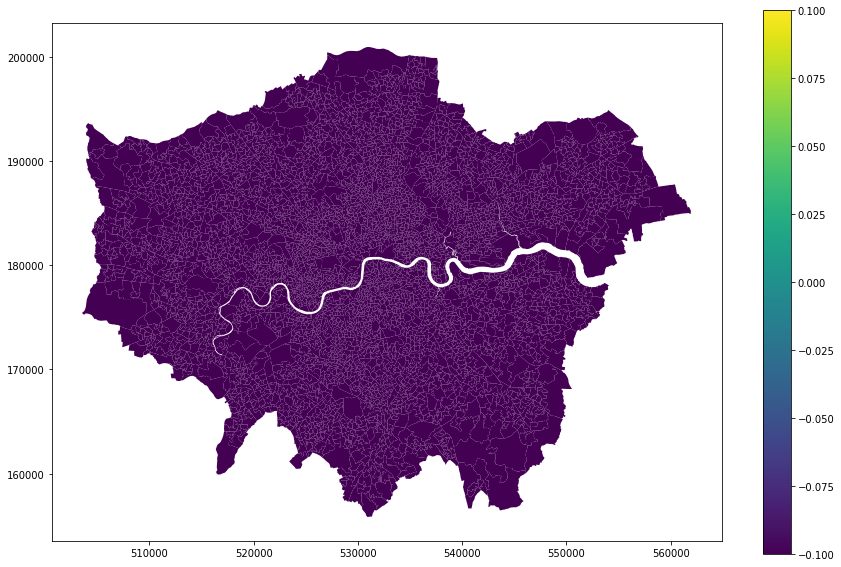

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

sw_df.plot(column='value', ax=ax, legend=True)